# PROJECT_2 : LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import table


# EDA

In [2]:
datafile = 'mojo_data.csv'
df = pd.read_csv(datafile, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            996 non-null    object 
 1   link_stub               996 non-null    object 
 2   rank                    996 non-null    object 
 3   title                   996 non-null    object 
 4   domestic_gross_x        996 non-null    object 
 5   release_year            996 non-null    int64  
 6   domestic_opening_gross  996 non-null    int64  
 7   budget                  996 non-null    int64  
 8   domestic_gross_y        996 non-null    int64  
 9   international_gross     996 non-null    int64  
 10  worldwide_gross         996 non-null    int64  
 11  runtime_minutes         975 non-null    float64
 12  rating                  867 non-null    object 
 13  release_month           996 non-null    int64  
 14  release_date            996 non-null    ob

In [4]:
df.rename( columns={'Unnamed: 0.1':'movie_title'}, inplace=True )
df.head(2)

,movie_title,link_stub,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
0,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [5]:
df.index = np.arange(1, len(df) + 1)

In [6]:
df.drop(['link_stub'], axis=1, inplace = True)

In [7]:
df.head(2)

,movie_title,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [8]:
df.drop(['domestic_gross_x'], axis=1, inplace = True)

In [9]:
df.head(2)

,movie_title,rank,title,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,Star Wars: Episode VII - The Force Awakens,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,Avengers: Endgame,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [10]:
df.drop(['title'], axis=1, inplace = True)

In [11]:
df.head(2)

,movie_title,rank,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"


In [12]:
df.rename( columns={'release_year':'year','domestic_opening_gross': 'opening_gross','domestic_gross_y':'domestic_gross','runtime_minutes':'runtime','release_month':'month'}, inplace=True )

In [13]:
df.head()

,movie_title,rank,year,opening_gross,budget,domestic_gross,international_gross,worldwide_gross,runtime,rating,month,release_date,genres
1,Star Wars: Episode VII - The Force Awakens,1,2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
2,Avengers: Endgame,2,2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
3,Avatar,3,2009,77025481,237000000,760507625,2029931467,2790439092,162.0,PG-13,12,2009-12-16,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
4,Black Panther,4,2018,202003951,0,700426566,647171407,1347597973,134.0,PG-13,2,2018-02-13,"['Action', 'Adventure', 'Sci-Fi']"
5,Avengers: Infinity War,5,2018,257698183,0,678815482,1369544272,2048359754,149.0,PG-13,4,2018-04-25,"['Action', 'Adventure', 'Sci-Fi']"


In [14]:
df.shape

(996, 13)

In [15]:
df = df.replace('?', np.NaN).dropna().reset_index(drop=True)

In [16]:
df.shape

(850, 13)

In [17]:
df.drop(df[df['year'] < 2000].index, inplace = True)

In [18]:
df.shape

(690, 13)

In [19]:
df['budget'].min()

0

In [20]:
df.drop(df[df['budget'] == 0].index, inplace = True)

In [21]:
column_names = ['worldwide_gross', 'opening_gross','domestic_gross', 'international_gross','budget', 'runtime','month','year', 'rating']

df = df.reindex(columns=column_names)

In [22]:
df.describe()

,worldwide_gross,opening_gross,domestic_gross,international_gross,budget,runtime,month,year
count,6.370000e+02,6.370000e+02,6.370000e+02,6.370000e+02,6.370000e+02,637.000000,637.00000,637.000000
mean,4.094220e+08,4.858320e+07,1.688334e+08,2.401884e+08,9.694005e+07,116.186813,7.11146,2010.084772
std,3.087186e+08,3.661999e+07,1.031269e+08,2.203840e+08,6.171187e+07,20.731162,3.26143,5.595290
min,8.608688e+07,7.787300e+04,7.995763e+07,2.450488e+06,1.500000e+04,81.000000,1.00000,2000.000000
25%,2.035094e+08,2.775124e+07,1.020844e+08,9.275912e+07,5.000000e+07,100.000000,5.00000,2005.000000
50%,3.149760e+08,3.911504e+07,1.333758e+08,1.750000e+08,8.400000e+07,113.000000,7.00000,2010.000000
75%,5.211708e+08,5.707144e+07,1.983515e+08,3.290037e+08,1.400000e+08,130.000000,10.00000,2015.000000
max,2.797801e+09,3.571150e+08,9.366622e+08,2.029931e+09,3.560000e+08,201.000000,12.00000,2020.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 849
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   worldwide_gross      637 non-null    int64  
 1   opening_gross        637 non-null    int64  
 2   domestic_gross       637 non-null    int64  
 3   international_gross  637 non-null    int64  
 4   budget               637 non-null    int64  
 5   runtime              637 non-null    float64
 6   month                637 non-null    int64  
 7   year                 637 non-null    int64  
 8   rating               637 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 49.8+ KB


# Initial assessments and visualizing using statsmodels, matplotlib and Seaborn

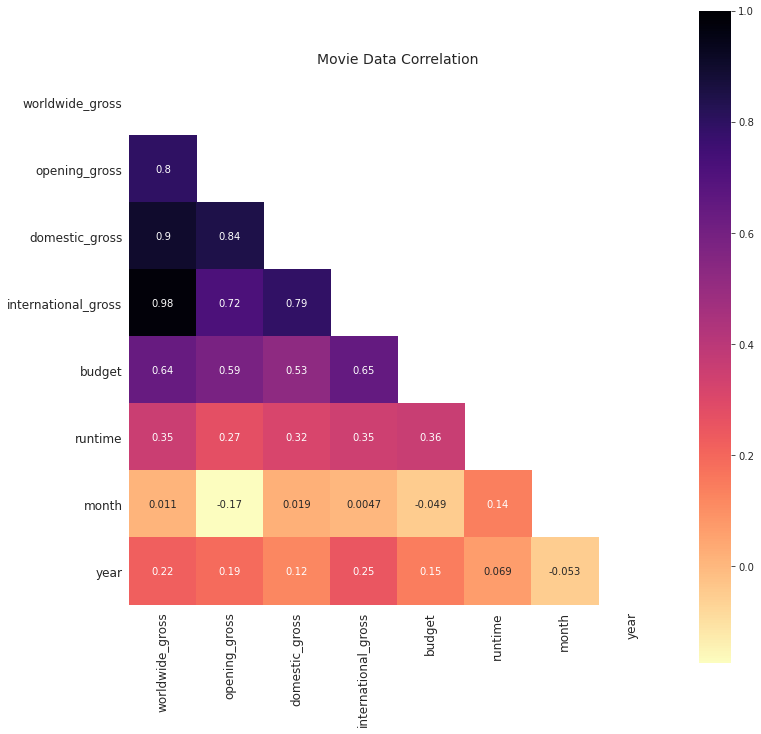

In [25]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, annot= True, mask=mask, vmax=1, square=True, cmap='magma_r')
   

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)    
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)


plt.title('Movie Data Correlation', fontsize = 14)

plt.savefig('movie_data_corr.pdf')              
plt.show()
    

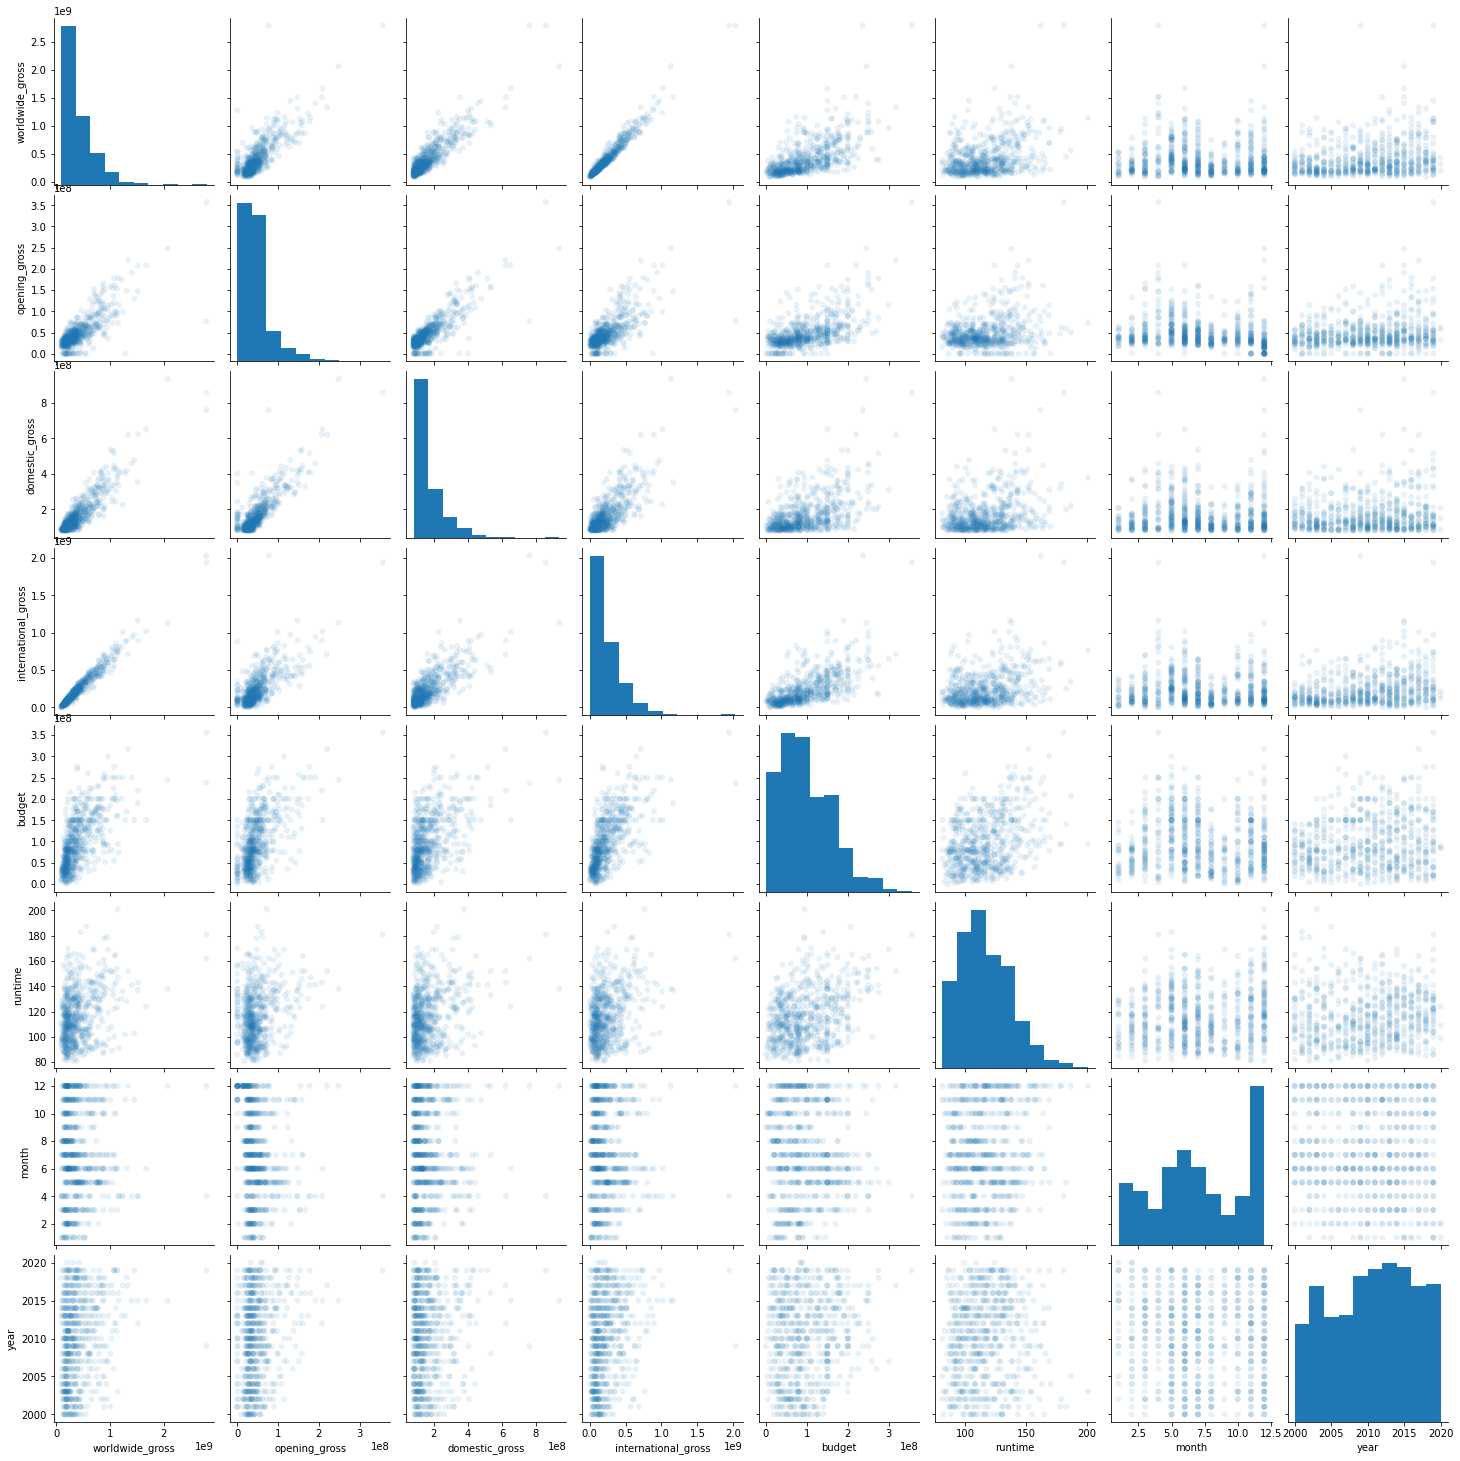

In [26]:
sns.pairplot(df, plot_kws=dict(alpha=0.1, edgecolor='none'))

For this project I would like to predict movie worldwide revenue, at the time we know the revenues from the domestic opening. I take the total domestic revenue and international revenues out from the dataset  as those data won't be available at upon domestic opening.  

In [27]:
lm = smf.ols('worldwide_gross ~ year + opening_gross + budget  + runtime + month', data = df)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     304.3
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          1.83e-165
Time:                        02:48:36   Log-Likelihood:                -12965.
No. Observations:                 637   AIC:                         2.594e+04
Df Residuals:                     631   BIC:                         2.597e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.496e+09   2.44e+09     -3.077      0.002   -1.23e+10   -2.71e+09
year            3.64e+06   1.21e+06      3.002      0.003    1.26e+06    6.02e+06
opening_gross     5.5274      0.231     23.904      0.000       5.073       5.981
budget            1.1217      0.138      8.133      0.000       0.851       1.393
runtime        1.066e+06   3.52e+05      3.032      0.003    3.76e+05    1.76e+06
month           1.22e+07   2.11e+06      5.772      0.000    8.05e+06    1.64e+07
==============================================================================
Omnibus:                      540.032   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27954.601
Skew:                           3.386   Prob(JB):                         0.00
Kurtosis:                      34.739   Cond. No.                     4.65e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Verifying if less features would result in better R^2

In [28]:
# Whithout release month:

lm = smf.ols('worldwide_gross ~ year + opening_gross + budget  + runtime', data = df)
fit1 = lm.fit()

In [29]:
#Putting back the release month and taking out the release year:

lm = smf.ols('worldwide_gross ~ month + opening_gross + budget  + runtime', data = df)
fit2 = lm.fit()

In [30]:
#Putting back the release month and taking out the runtime:

lm = smf.ols('worldwide_gross ~ year + opening_gross + budget  + month', data = df)
fit3 = lm.fit()
print(fit3)

Taking out any features resulted in worst R^2 so I keep them all for further analysis.

# Feature engineering & selection and Cross Validation 

In [31]:
X = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

In [32]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X, y = np.array(X), np.array(y)

In [33]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_lm_scores = []

for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X_train, y_train)
    cv_lm_scores.append(round(lm.score(X_val, y_val), 3))

print(f"Regression scores: {cv_lm_scores}")
print(f"Mean score : {np.mean(cv_lm_scores):.3f} +- {np.std(cv_lm_scores):.3f}")

Regression scores: [0.598, 0.777, 0.846, 0.821, 0.644]
Mean score : 0.737 +- 0.098


In [34]:
X1 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X1['opening_sq'] = X1['opening_gross']**2

In [35]:
X1, X1_test, y, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)
X1, y = np.array(X1), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_1 = []

for train_ind, val_ind in kf.split(X1, y):
    X1_train, y_train = X1[train_ind], y[train_ind]
    X1_val, y_val = X1[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X1_train, y_train)
    cv_scores_1.append(round(lm.score(X1_val, y_val), 3))

print(f"Regression scores: {cv_scores_1}")
print(f"Mean score : {np.mean(cv_scores_1):.3f} +- {np.std(cv_scores_1):.3f}")


Regression scores: [0.603, 0.777, 0.843, 0.824, 0.637]
Mean score : 0.737 +- 0.098


In [36]:
X2 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X2['budget_sq'] = X2['budget']**2

X2, X2_test, y, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
X2, y = np.array(X2), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_2 = []

for train_ind, val_ind in kf.split(X2, y):
    X2_train, y_train = X2[train_ind], y[train_ind]
    X2_val, y_val = X2[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X2_train, y_train)
    cv_scores_2.append(round(lm.score(X2_val, y_val), 3))

print(f"Regression scores: {cv_scores_2}")
print(f"Mean score : {np.mean(cv_scores_2):.3f} +- {np.std(cv_scores_2):.3f}")


Regression scores: [0.555, 0.77, 0.832, 0.798, 0.621]
Mean score : 0.715 +- 0.108


In [37]:
X3 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X3['runtime_sq'] = X3['runtime']**2

X3, X3_test, y, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 42)
X3, y = np.array(X3), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_3 = []

for train_ind, val_ind in kf.split(X3, y):
    X3_train, y_train = X3[train_ind], y[train_ind]
    X3_val, y_val = X3[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X3_train, y_train)
    cv_scores_3.append(round(lm.score(X3_val, y_val), 3))

print(f"Regression scores: {cv_scores_3}")
print(f"Mean score : {np.mean(cv_scores_3):.3f} +- {np.std(cv_scores_3):.3f}")


Regression scores: [0.601, 0.77, 0.839, 0.836, 0.66]
Mean score : 0.741 +- 0.096


In [38]:
X4 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X4['runtime_sq'] = X4['runtime']**2
X4['month_sq'] = X4['month']**2

X4, X4_test, y, y_test = train_test_split(X4, y, test_size = 0.2, random_state = 42)
X4, y = np.array(X4), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_4 = []

for train_ind, val_ind in kf.split(X4, y):
    X4_train, y_train = X4[train_ind], y[train_ind]
    X4_val, y_val = X4[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X4_train, y_train)
    cv_scores_4.append(round(lm.score(X4_val, y_val), 3))

print(f"Regression scores: {cv_scores_4}")
print(f"Mean score : {np.mean(cv_scores_4):.3f} +- {np.std(cv_scores_4):.3f}")


Regression scores: [0.602, 0.769, 0.837, 0.837, 0.66]
Mean score : 0.741 +- 0.095


In [39]:
X5 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X5['runtime_sq'] = X5['runtime']**2
X5['year_sq'] = X5['year']**2

X5, X5_test, y, y_test = train_test_split(X5, y, test_size = 0.2, random_state = 42)
X5, y = np.array(X5), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_5 = []

for train_ind, val_ind in kf.split(X5, y):
    X5_train, y_train = X5[train_ind], y[train_ind]
    X5_val, y_val = X5[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X5_train, y_train)
    cv_scores_5.append(round(lm.score(X5_val, y_val), 3))

print(f"Regression scores: {cv_scores_5}")
print(f"Mean score : {np.mean(cv_scores_5):.3f} +- {np.std(cv_scores_5):.3f}")

Regression scores: [0.603, 0.771, 0.836, 0.836, 0.661]
Mean score : 0.741 +- 0.094


In [40]:
X6 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']
X6['runtime_sq'] = X6['runtime']**2
X6['c1'] = X6['budget']*X6['runtime']

X6, X6_test, y, y_test = train_test_split(X6, y, test_size = 0.2, random_state = 42)
X6, y = np.array(X6), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_6 = []

for train_ind, val_ind in kf.split(X6, y):
    X6_train, y_train = X6[train_ind], y[train_ind]
    X6_val, y_val = X6[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X6_train, y_train)
    cv_scores_6.append(round(lm.score(X6_val, y_val), 3))

print(f"Regression scores: {cv_scores_6}")
print(f"Mean score : {np.mean(cv_scores_6):.3f} +- {np.std(cv_scores_6):.3f}")


Regression scores: [0.606, 0.774, 0.842, 0.827, 0.658]
Mean score : 0.741 +- 0.094


In [41]:
X7 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X7['runtime_sq'] = X7['runtime']**2
X7['c2'] = X7['opening_gross']*X7['runtime']

X7, X7_test, y, y_test = train_test_split(X7, y, test_size = 0.2, random_state = 42)
X7, y = np.array(X7), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_7 = []

for train_ind, val_ind in kf.split(X7, y):
    X7_train, y_train = X7[train_ind], y[train_ind]
    X7_val, y_val = X7[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X7_train, y_train)
    cv_scores_7.append(round(lm.score(X7_val, y_val), 3))

print(f"Regression scores: {cv_scores_7}")
print(f"Mean score : {np.mean(cv_scores_7):.3f} +- {np.std(cv_scores_7):.3f}")


Regression scores: [0.601, 0.77, 0.84, 0.778, 0.663]
Mean score : 0.730 +- 0.086


In [42]:
X8 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X8['runtime_sq'] = X8['runtime']**2
X8['c3'] = X8['opening_gross']/X8['year']

X8, X8_test, y, y_test = train_test_split(X8, y, test_size = 0.2, random_state = 42)
X8, y = np.array(X8), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_8 = []

for train_ind, val_ind in kf.split(X8, y):
    X8_train, y_train = X8[train_ind], y[train_ind]
    X8_val, y_val = X8[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X8_train, y_train)
    cv_scores_8.append(round(lm.score(X8_val, y_val), 3))

print(f"Regression scores: {cv_scores_8}")
print(f"Mean score : {np.mean(cv_scores_8):.3f} +- {np.std(cv_scores_8):.3f}")

Regression scores: [0.605, 0.773, 0.83, 0.841, 0.664]
Mean score : 0.743 +- 0.093


In [43]:
X9 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X9['runtime_sq'] = X9['runtime']**2
X9['c4']= X9['budget']/X9['year']

X9, X9_test, y, y_test = train_test_split(X9, y, test_size = 0.2, random_state = 42)
X9, y = np.array(X9), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_9 = []

for train_ind, val_ind in kf.split(X9, y):
    X9_train, y_train = X9[train_ind], y[train_ind]
    X9_val, y_val = X9[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X9_train, y_train)
    cv_scores_9.append(round(lm.score(X9_val, y_val), 3))

print(f"Regression scores: {cv_scores_9}")
print(f"Mean score : {np.mean(cv_scores_9):.3f} +- {np.std(cv_scores_9):.3f}")

Regression scores: [0.607, 0.774, 0.836, 0.843, 0.662]
Mean score : 0.744 +- 0.095


In [44]:
X10 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X10['runtime_sq'] = X10['runtime']**2
X10['c4']= X10['budget']/X10['year']
X10['c5']= X10['month']*X10['runtime']


X10, X10_test, y, y_test = train_test_split(X10, y, test_size = 0.2, random_state = 42)
X10, y = np.array(X10), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_10 = []

for train_ind, val_ind in kf.split(X10, y):
    X10_train, y_train = X10[train_ind], y[train_ind]
    X10_val, y_val = X10[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X10_train, y_train)
    cv_scores_10.append(round(lm.score(X10_val, y_val), 3))

print(f"Regression scores: {cv_scores_10}")
print(f"Mean score : {np.mean(cv_scores_10):.3f} +- {np.std(cv_scores_10):.3f}")

Regression scores: [0.606, 0.781, 0.828, 0.837, 0.672]
Mean score : 0.745 +- 0.091


In [45]:
X11 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X11['runtime_sq'] = X11['runtime']**2
X11['c4'] = X11['budget']/X11['year']
X11['c5']= X11['month']*X11['runtime']
X11['c6']= X11['month']*X11['year']

X11, X11_test, y, y_test = train_test_split(X11, y, test_size = 0.2, random_state = 42)
X11, y = np.array(X11), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_11 = []

for train_ind, val_ind in kf.split(X11, y):
    X11_train, y_train = X11[train_ind], y[train_ind]
    X11_val, y_val = X11[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X11_train, y_train)
    cv_scores_11.append(round(lm.score(X11_val, y_val), 3))

print(f"Regression scores: {cv_scores_11}")
print(f"Mean score : {np.mean(cv_scores_11):.3f} +- {np.std(cv_scores_11):.3f}")

Regression scores: [0.607, 0.782, 0.829, 0.837, 0.671]
Mean score : 0.745 +- 0.091


In [46]:
X12 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year']]
y = df['worldwide_gross']

X12['runtime_sq'] = X12['runtime']**2
X12['c4'] = X12['budget']/X12['year']
X12['c5']= X12['month']*X12['runtime']
X12['c7']= X12['month']*X12['opening_gross']

X12, X12_test, y, y_test = train_test_split(X12, y, test_size = 0.2, random_state = 42)
X12, y = np.array(X12), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_12 = []

for train_ind, val_ind in kf.split(X12, y):
    X12_train, y_train = X12[train_ind], y[train_ind]
    X12_val, y_val = X12[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X12_train, y_train)
    cv_scores_12.append(round(lm.score(X12_val, y_val), 3))

print(f"Regression scores: {cv_scores_12}")
print(f"Mean score : {np.mean(cv_scores_12):.3f} +- {np.std(cv_scores_12):.3f}")

Regression scores: [0.625, 0.783, 0.827, 0.843, 0.685]
Mean score : 0.753 +- 0.084


### movie rating

In [47]:
print(df.rating.value_counts())

PG-13    335
PG       146
R        145
G         11
Name: rating, dtype: int64


In [48]:
X=patsy.dmatrix('rating', data = df, return_type = 'dataframe')
X.head(5)

,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R]
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0


In [49]:
df=df.join(X)
df.head(2)

,worldwide_gross,opening_gross,domestic_gross,international_gross,budget,runtime,month,year,rating,Intercept,rating[T.PG],rating[T.PG-13],rating[T.R]
0,2068454133,247966675,936662225,1131791908,245000000,138.0,12,2015,PG-13,1.0,0.0,1.0,0.0
1,2797800564,357115007,858373000,1939427564,356000000,181.0,4,2019,PG-13,1.0,0.0,1.0,0.0


In [50]:
df.rename(columns={'rating[T.PG]':'PG', 'rating[T.PG-13]':'PG_13', 'rating[T.R]':'R'}, inplace=True )

In [51]:
df.head(2)

,worldwide_gross,opening_gross,domestic_gross,international_gross,budget,runtime,month,year,rating,Intercept,PG,PG_13,R
0,2068454133,247966675,936662225,1131791908,245000000,138.0,12,2015,PG-13,1.0,0.0,1.0,0.0
1,2797800564,357115007,858373000,1939427564,356000000,181.0,4,2019,PG-13,1.0,0.0,1.0,0.0


In [52]:
X13 = df.loc[:,['opening_gross', 'budget', 'runtime', 'month', 'year','PG', 'PG_13', 'R']]
y = df['worldwide_gross']

X13['runtime_sq'] = X13['runtime']**2
X13['c4'] = X13['budget']/X13['year']
X13['c5']= X13['month']*X13['runtime']
X13['c7']= X13['month']*X13['opening_gross']


X13, X13_test, y, y_test = train_test_split(X13, y, test_size = 0.2, random_state = 42)
X13, y = np.array(X13), np.array(y)

kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
cv_scores_13 = []

for train_ind, val_ind in kf.split(X13, y):
    X13_train, y_train = X13[train_ind], y[train_ind]
    X13_val, y_val = X13[val_ind], y[val_ind]
    
    lm = LinearRegression()
    
    lm.fit(X13_train, y_train)
    cv_scores_13.append(round(lm.score(X13_val, y_val), 3))

print(f"Regression scores: {cv_scores_13}")
print(f"Mean score : {np.mean(cv_scores_13):.3f} +- {np.std(cv_scores_13):.3f}")

Regression scores: [0.634, 0.793, 0.832, 0.846, 0.693]
Mean score : 0.760 +- 0.083


In [53]:
lm.fit(X13, y)
print(f"Regression test score: {lm.score(X13_test, y_test):.3f}")

Regression test score: 0.511


In [54]:
data = [['model','simple features: opening_gross, budget,runtime, month,year', round(np.mean(cv_lm_scores),3)],
        ['model_1','simple + opening_gross**2', round(np.mean(cv_scores_1),3)],
        ['model_2','simple + budget**2', round(np.mean(cv_scores_2),3)],
        ['model_3','simple + runtime**2', round(np.mean(cv_scores_3),3)],
        ['model_4','simple + runtime**2 + month**2', round(np.mean(cv_scores_4),3)],
        ['model_5','simple + runtime**2 + year**2',round(np.mean(cv_scores_5),3)],
        ['model_6','simple + runtime**2 + c1(budget*runtime)',round(np.mean(cv_scores_6),3)],
        ['model_7','simple + runtime**2 + c2(opening_gross*runtime)',round(np.mean(cv_scores_7),3)],
        ['model_8','simple + runtime**2 + c3(opening_gross/year)', round(np.mean(cv_scores_8),3)],
        ['model_9','simple + runtime**2 + c4(budget/year)', round(np.mean(cv_scores_9),3)],
        ['model_10','simple + runtime**2 + c4 + c5(month*runtime)', round(np.mean(cv_scores_9),3)],
        ['model_11','simple + runtime**2 + c4 + c5 + c6(month*year)', round(np.mean(cv_scores_11),3)],
        ['model_12','simple + runtime**2 + c4 + c5 + c7(month*opening_gross)', round(np.mean(cv_scores_12),3)],
        ['model_13','simple + runtime**2 + c4 + c5 + c7 + PG + PG_13 + R', round(np.mean(cv_scores_13),3)]]


model_scores = pd.DataFrame(data, columns = ['model', 'features', 'mean_validation_R^2'])

model_scores.style.set_properties(subset=['model'], **{'width': '50px'})
model_scores.style.set_properties(subset=['mean_validation_R^2'], **{'width': '30px'})                            
model_scores.style.set_properties(subset=['features'], **{'width': '300px'})
model_scores.style.set_properties(subset=['features'], **{'text-align': 'left'})
model_scores.set_index('model', inplace = True)
model_scores

,features,mean_validation_R^2
model,,
model,"simple features: opening_gross, budget,runtime...",0.737
model_1,simple + opening_gross**2,0.737
model_2,simple + budget**2,0.715
model_3,simple + runtime**2,0.741
model_4,simple + runtime**2 + month**2,0.741
model_5,simple + runtime**2 + year**2,0.741
model_6,simple + runtime**2 + c1(budget*runtime),0.741
model_7,simple + runtime**2 + c2(opening_gross*runtime),0.730
model_8,simple + runtime**2 + c3(opening_gross/year),0.743


In [55]:
model_scores['mean_validation_R^2'].idxmax()

'model_13'

### movie genres and actors

Too many to dummify. Each movie row includes several categories.
The movie genres need more rework to have group some genres together in another category and put just one category for each movie row before dummify.
Thinking in grouping into movie genres into the 6 categories:

- Action: 'Action', 'Sport','Adventure'
- Family: Family', 'Drama', 'Commedy', 'Romance'
- Documentary: 'History','Documentary','Biography'
- Crime_Thriller : 'Crime', 'Thriller'
- Animation
- Others

In the same way, each movie row have a list of several actors. I thought of categorising the actors into A class and non A class. I chosen to focus more on regularisation as I am really weak in getting/scraping.

For now, I'm excluding the movie genres and actors from the analysis

## LASSO REGULARISATION

With Lasso Regularisation I would like to first verify the candidate model outcome from the cross validation but I also wanted to reverify the case including only simple features.

## Case_1

This case corresponds to the best outcome from the cross validation, i.e., model 13

In [59]:
selected_df = df.loc[:,['worldwide_gross','opening_gross','budget','runtime','month','year','PG','PG_13','R']]

In [60]:
selected_df['runtime_sq'] = selected_df['runtime']**2
selected_df['c4'] = selected_df['budget']/selected_df['year']
selected_df['c5']= selected_df['month']*selected_df['runtime']
selected_df['c7']= selected_df['month']*selected_df['opening_gross']

In [61]:
selected_df.head(2)

,worldwide_gross,opening_gross,budget,runtime,month,year,PG,PG_13,R,runtime_sq,c4,c5,c7
0,2068454133,247966675,245000000,138.0,12,2015,0.0,1.0,0.0,19044.0,121588.089330,1656.0,2975600100
1,2797800564,357115007,356000000,181.0,4,2019,0.0,1.0,0.0,32761.0,176324.913323,724.0,1428460028


In [62]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 849
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   worldwide_gross  637 non-null    int64  
 1   opening_gross    637 non-null    int64  
 2   budget           637 non-null    int64  
 3   runtime          637 non-null    float64
 4   month            637 non-null    int64  
 5   year             637 non-null    int64  
 6   PG               637 non-null    float64
 7   PG_13            637 non-null    float64
 8   R                637 non-null    float64
 9   runtime_sq       637 non-null    float64
 10  c4               637 non-null    float64
 11  c5               637 non-null    float64
 12  c7               637 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 69.7 KB


In [63]:
#sns.pairplot(selected_df)

In [64]:
X = selected_df.loc[:,['opening_gross','budget','runtime','month','year','PG','PG_13','R',
                       'runtime_sq', 'c4', 'c5', 'c7']]

y = selected_df['worldwide_gross']

In [65]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [66]:
X_train.columns

Index(['opening_gross', 'budget', 'runtime', 'month', 'year', 'PG', 'PG_13',
       'R', 'runtime_sq', 'c4', 'c5', 'c7'],
      dtype='object')

In [67]:
X_train.shape

(381, 12)

In [68]:
X_val.shape

(128, 12)

In [69]:
X_test.shape

(128, 12)

In [70]:
selected_columns = ['opening_gross','budget','runtime','month','year','PG','PG_13','R',
                    'runtime_sq', 'c4', 'c5', 'c7']

In [71]:
lasso_model = Lasso(alpha = 1000000) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

/Users/carlamoestafa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.818334515495326e+18, tolerance: 3146366811264461.5
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1000000)

I thought the alpha value was already quite high, so I just left it at that and expecting the Lasso Regularisation will take care of this convergence issue.

In [72]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

Text(0.5, 1.0, 'Predicted Worldwide Gross vs Actual')

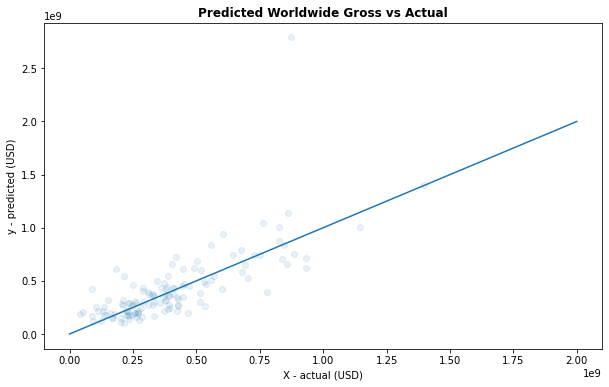

In [73]:
plt.figure(figsize = [10, 6])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,2000000000,1000), np.linspace(0,2000000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
#plt.savefig('case_1_lr');

In [74]:
#r-squared
print(f"Regression test score: {r2_score(y_test, test_set_pred):.3f}")

Regression test score: 0.533


In [75]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred):,.0f}")


MAE : 119,660,515


Without standard scaling the predicted  worldwide gross will be under/over estimated by about 119.7 Million USD, this is achieved with very high alpha number!

### Standard scaling

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [78]:
X_tr = std.transform(X_train.values)

In [79]:
X_te = std.transform(X_test.values)

(array([37., 32., 19., 37., 58., 43., 25., 16., 33., 81.]),
 array([-1.84644407, -1.50925684, -1.1720696 , -0.83488236, -0.49769512,
        -0.16050788,  0.17667935,  0.51386659,  0.85105383,  1.18824107,
         1.52542831]),
 <a list of 10 Patch objects>)

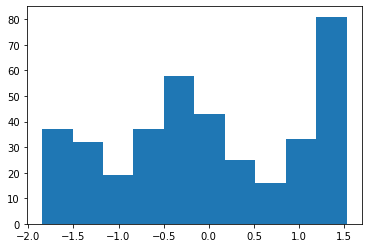

In [80]:
plt.hist(X_tr[:,3])

In [81]:
lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=1000000)

In [82]:
list(zip(X_train.columns, lasso_model.coef_))

[('opening_gross', 209053905.35255387),
 ('budget', 51980122.60185352),
 ('runtime', 0.0),
 ('month', -37437388.90631775),
 ('year', 23545385.934796773),
 ('PG', 11771928.70355501),
 ('PG_13', -35142781.35733577),
 ('R', -29146403.433878798),
 ('runtime_sq', 0.0),
 ('c4', 0.0),
 ('c5', 92386576.01411815),
 ('c7', -12481231.132643297)]

In [83]:
test_set_pred_scaled = lasso_model.predict(X_te)

Text(0.5, 1.0, 'Predicted Worldwide Gross vs Actual')

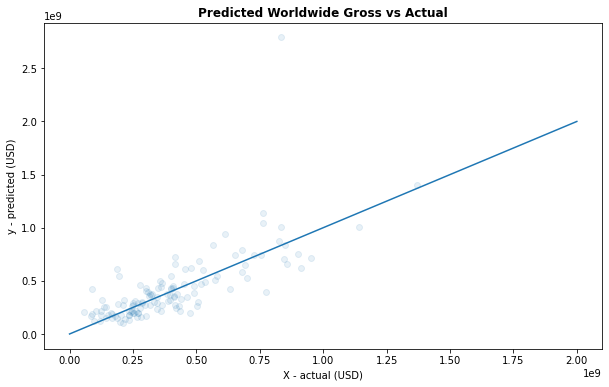

In [84]:
plt.figure(figsize= [10, 6])
plt.scatter(test_set_pred_scaled, y_test, alpha=.1)
plt.plot(np.linspace(0,2000000000,1000), np.linspace(0,2000000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
#plt.savefig('case_1_lr_s');

In [85]:
#r-squared
print(f"Regression test score: {r2_score(y_test, test_set_pred_scaled):.3f}")

Regression test score: 0.523


In [86]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_scaled):,.0f}")


MAE : 118,697,872


## Case_2

The Case 2 corresponds to the model including simple features only and the categorical features

In [87]:
selected_df2 = df.loc[:,['worldwide_gross','opening_gross','budget','runtime','month','year','PG','PG_13','R']]

In [88]:
X2 = selected_df2.loc[:,['opening_gross','budget','runtime','month','year','PG','PG_13','R']]
y = selected_df2['worldwide_gross']

In [89]:
X2_train_val, X2_test, y_train_val, y_test = train_test_split(X2, y, test_size=0.2,random_state=42)
X2_train, X2_val, y_train, y_val = train_test_split(X2_train_val, y_train_val, test_size=.25, random_state=43)

In [90]:
lasso_model = Lasso(alpha = 10000000) 
lasso_model.fit(X2_train, y_train)

Lasso(alpha=10000000)

In [91]:
test_set_pred_2 = lasso_model.predict(X2_test)

In [92]:
print(f"Regression test score: {r2_score(y_test, test_set_pred_2):.3f}")

Regression test score: 0.509


In [93]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_2):,.0f}")

MAE : 116,651,512


In [94]:
# Standard Scaling
std.fit(X2_train.values)

StandardScaler()

In [95]:
X2_tr = std.transform(X2_train.values)

In [96]:
X2_te = std.transform(X2_test.values)

In [97]:
lasso_model = Lasso(alpha = 10000000)
lasso_model.fit(X2_tr,y_train)

Lasso(alpha=10000000)

In [98]:
list(zip(X2_train.columns, lasso_model.coef_))

[('opening_gross', 187496117.944398),
 ('budget', 54585910.58516189),
 ('runtime', 22009194.943790685),
 ('month', 27214359.896031126),
 ('year', 16649587.019795515),
 ('PG', 27625526.09225628),
 ('PG_13', -0.0),
 ('R', -0.0)]

In [99]:
test_set_pred_scaled_2 = lasso_model.predict(X2_te)

Text(0.5, 1.0, 'Predicted Worldwide Gross vs Actual')

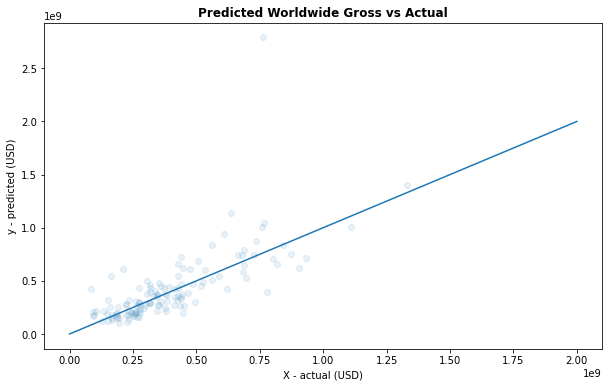

In [100]:
plt.figure(figsize= [10, 6])
plt.scatter(test_set_pred_scaled_2, y_test, alpha=.1)
plt.plot(np.linspace(0,2000000000,1000), np.linspace(0,2000000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
#plt.savefig('case_2_lr_s');

In [101]:
print(f"Regression test score: {r2_score(y_test, test_set_pred_scaled_2):.3f}")

Regression test score: 0.505


In [102]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_scaled_2):,.0f}")

MAE : 115,994,231


### Case 3:  Removing top opening gross values

This 3rd case was investigated after the presentation to deal with outliers of top high grossing movies at the opening. I investigated based on Case 1 but with data for opening gross more than 200 Millions removed.

#### Applied to preselected model 13:

In [103]:
selected_df3a = df.loc[:,['worldwide_gross','opening_gross','budget','runtime','month','year','PG','PG_13','R']]
selected_df3a['runtime_sq'] = selected_df3a['runtime']**2
selected_df3a['c4'] = selected_df3a['budget']/selected_df3a['year']
selected_df3a['c5']= selected_df3a['month']*selected_df3a['runtime']
selected_df3a['c7']= selected_df3a['month']*selected_df3a['opening_gross']

In [104]:
selected_df3a.drop(selected_df3a[selected_df3a['opening_gross'] > 200000000].index, inplace = True)

In [105]:
X3a = selected_df3a.loc[:,['opening_gross','budget','runtime','month','year','PG','PG_13','R',
                           'runtime_sq','c4','c5','c7']]
y = selected_df3a['worldwide_gross']

In [106]:
X3a_train_val, X3a_test, y_train_val, y_test = train_test_split(X3a, y, test_size=0.2,random_state=42)
X3a_train, X3a_val, y_train, y_val = train_test_split(X3a_train_val, y_train_val, test_size=.25, random_state=43)

In [107]:
std.fit(X3a_train.values)
X3a_tr = std.transform(X3a_train.values)
X3a_te = std.transform(X3a_test.values)

In [108]:
lasso_model = Lasso(alpha = 10000000)
lasso_model.fit(X3a_tr,y_train)

Lasso(alpha=10000000)

In [109]:
list(zip(X3a_train.columns, lasso_model.coef_))

[('opening_gross', 161859254.5977459),
 ('budget', 69804824.63799714),
 ('runtime', 0.0),
 ('month', 0.0),
 ('year', 9624883.509850286),
 ('PG', 17621363.448167335),
 ('PG_13', -0.0),
 ('R', -0.0),
 ('runtime_sq', 8019851.669258544),
 ('c4', 0.0),
 ('c5', 38607514.2724307),
 ('c7', 0.0)]

In [110]:
test_set_pred_scaled_3a = lasso_model.predict(X3a_te)

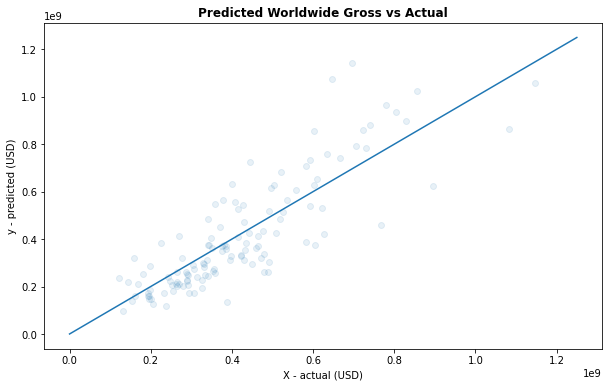

In [111]:
plt.figure(figsize= [10, 6])
plt.scatter(test_set_pred_scaled_3a, y_test, alpha=.1)
plt.plot(np.linspace(0,1250000000,1000), np.linspace(0,1250000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
plt.savefig('case_3a_lr_s.pdf');

In [112]:
print(f"Regression test score: {r2_score(y_test, test_set_pred_scaled_3a):.3f}")

Regression test score: 0.714


In [113]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_scaled_3a):,.0f}")

MAE : 96,875,631


#### Applied to the base model without second order and interaction features

In [114]:
selected_df3b = df.loc[:,['worldwide_gross','opening_gross','budget','runtime','month','year','PG','PG_13','R']]

In [115]:
selected_df3b.drop(selected_df3b[selected_df3b['opening_gross'] > 200000000].index, inplace = True)

In [116]:
selected_df3b.describe()

,worldwide_gross,opening_gross,budget,runtime,month,year,PG,PG_13,R
count,6.320000e+02,6.320000e+02,6.320000e+02,632.000000,632.000000,632.000000,632.000000,632.000000,632.00000
mean,3.978064e+08,4.700342e+07,9.566901e+07,115.938291,7.107595,2010.041139,0.231013,0.522152,0.22943
std,2.769543e+08,3.174968e+07,5.992168e+07,20.553459,3.257731,5.591896,0.421814,0.499905,0.42080
min,8.608688e+07,7.787300e+04,1.500000e+04,81.000000,1.000000,2000.000000,0.000000,0.000000,0.00000
25%,2.033883e+08,2.769678e+07,4.800000e+07,100.000000,5.000000,2005.000000,0.000000,0.000000,0.00000
50%,3.129463e+08,3.876917e+07,8.225000e+07,113.000000,7.000000,2010.000000,0.000000,1.000000,0.00000
75%,4.977527e+08,5.629648e+07,1.400000e+08,130.000000,10.000000,2015.000000,0.000000,1.000000,0.00000
max,2.790439e+09,1.912711e+08,3.000000e+08,201.000000,12.000000,2020.000000,1.000000,1.000000,1.00000


In [117]:
X3b = selected_df3b.loc[:,['opening_gross','budget','runtime','month','year','PG','PG_13','R']]
y = selected_df3b['worldwide_gross']

In [118]:
X3b_train_val, X3b_test, y_train_val, y_test = train_test_split(X3b, y, test_size=0.2,random_state=42)
X3b_train, X3b_val, y_train, y_val = train_test_split(X3b_train_val, y_train_val, test_size=.25, random_state=43)

In [119]:
std.fit(X3b_train.values)
X3b_tr = std.transform(X3b_train.values)
X3b_te = std.transform(X3b_test.values)

In [120]:
lasso_model = Lasso(alpha = 10000000)
lasso_model.fit(X3b_tr,y_train)

Lasso(alpha=10000000)

In [121]:
list(zip(X3b_train.columns, lasso_model.coef_))

[('opening_gross', 159041094.8164125),
 ('budget', 70709577.7239483),
 ('runtime', 19840417.645752076),
 ('month', 25733942.189236),
 ('year', 9350471.469674475),
 ('PG', 17423339.597052913),
 ('PG_13', -0.0),
 ('R', -0.0)]

In [122]:
test_set_pred_scaled_3b = lasso_model.predict(X3b_te)

Text(0.5, 1.0, 'Predicted Worldwide Gross vs Actual')

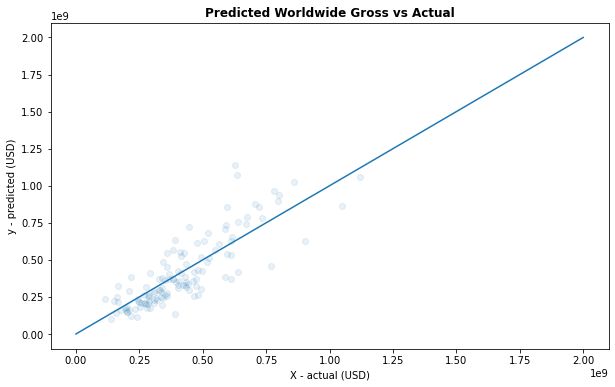

In [123]:
plt.figure(figsize= [10, 6])
plt.scatter(test_set_pred_scaled_3b, y_test, alpha=.1)
plt.plot(np.linspace(0,2000000000,1000), np.linspace(0,2000000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
#plt.savefig('case_3b_lr_s');

In [124]:
print(f"Regression test score: {r2_score(y_test, test_set_pred_scaled_3b):.3f}")

Regression test score: 0.701


In [125]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_scaled_3b):,.0f}")

MAE : 98,521,814


### Case 4: removing low opening grossing

In [126]:
selected_df4 = df.loc[:,['worldwide_gross','opening_gross','budget','runtime','month','year','PG','PG_13','R']]

In [127]:
selected_df4['runtime_sq'] = selected_df4['runtime']**2
selected_df4['c4'] = selected_df4['budget']/selected_df4['year']
selected_df4['c5']= selected_df4['month']*selected_df4['runtime']
selected_df4['c7']= selected_df4['month']*selected_df4['opening_gross']

In [128]:
selected_df4.drop(selected_df4[selected_df4['opening_gross'] > 200000000].index, inplace = True)

In [129]:
selected_df4.drop(selected_df4[selected_df4['opening_gross'] < 500000].index, inplace = True)

In [130]:
# selected_df4.info()

In [131]:
X4 = selected_df4.loc[:,['opening_gross','budget','runtime','month','year','PG','PG_13','R','runtime_sq',
                         'c4','c5','c7']]
y = selected_df4['worldwide_gross']
X4_train_val, X4_test, y_train_val, y_test = train_test_split(X4, y, test_size=0.2,random_state=42)
X4_train, X4_val, y_train, y_val = train_test_split(X4_train_val, y_train_val, test_size=.25, random_state=43)

In [132]:
std.fit(X4_train.values)
X4_tr = std.transform(X4_train.values)
X4_te = std.transform(X4_test.values)

In [133]:
lasso_model = Lasso(alpha = 10000000)
lasso_model.fit(X4_tr,y_train)
list(zip(X4_train.columns, lasso_model.coef_))

[('opening_gross', 189193060.50428137),
 ('budget', 29656854.764830902),
 ('runtime', 0.0),
 ('month', 0.0),
 ('year', 8334266.599113707),
 ('PG', 25234480.08759558),
 ('PG_13', -0.0),
 ('R', -0.0),
 ('runtime_sq', 16026703.937640121),
 ('c4', 0.0),
 ('c5', 28124787.39421934),
 ('c7', 2545653.209226347)]

Text(0.5, 1.0, 'Predicted Worldwide Gross vs Actual')

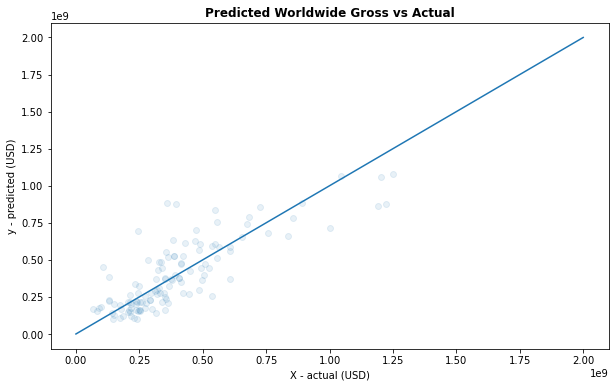

In [134]:
test_set_pred_scaled_4 = lasso_model.predict(X4_te)
plt.figure(figsize= [10, 6])
plt.scatter(test_set_pred_scaled_4, y_test, alpha=.1)
plt.plot(np.linspace(0,2000000000,1000), np.linspace(0,2000000000,1000))
plt.xlabel('X - actual (USD)', fontsize = 10)
plt.ylabel('y - predicted (USD)', fontsize = 10)
plt.title('Predicted Worldwide Gross vs Actual',fontsize = 12,weight='bold')
#plt.savefig('case_4_lr_s');

In [135]:
print(f"Regression test score: {r2_score(y_test, test_set_pred_scaled_4):.3f}")

Regression test score: 0.638


In [136]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print(f"MAE : {mae(y_test, test_set_pred_scaled_4):,.0f}")

MAE : 105,013,626


Model with best test score and MAE corresponds to Case 3a with the opening gross data value more than 200MM USD removed and   includes the following features after regularisation:
- opening_gross   
- budget
- year
- PG
- runtime**2
- c5 = month x runtime

Note: I should  have continued my investigation with Tuning Regularisation but to be honest I still haven't fully understood the process.